# Data Science
# DV Lab 04 -  Exploratory Data Analysis


In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#display wide tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

We have a list of 10,000 movies with IMDB user rating as imdb.txt. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [24]:
!head imdb.txt


'head' is not recognized as an internal or external command,
operable program or batch file.


## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [25]:
# Your code here
cols = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']

data = pd.read_csv('imdb.txt', names = cols, delimiter = '\t')

data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


__Marks = 2__

Check the data types of each column

In [26]:
# Your code here
data.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

__Marks = 1__

## 2. Clean the DataFrame

The data frame has several problems

1. The runtime column is stored as a string
2. The genres column has several genres together. This way, it is hard to check which movies are Action movies and so on.
3. The movie year is also present in the title


### Fix the runtime column
Convert the string '142 mins' to number 142.

In [27]:
# Your code here
#run1 = data.iloc[0, 5]
#min, unit = run1.split(' ')
#data.iloc[0, 5] = int(min)
#data.head()


# above method will display an error in the next block so instead of changing it in data we'll change the value '142 mins' explicitly
int(data.iloc[0,5].split(' ')[0])

142

__Marks = 3__

Perform this conversion on every element in the dataframe `data`

In [28]:
# Your code here
data_rt = data['runtime'].str.split(' ', expand = True)
data['runtime'] = data_rt[0].astype(int)

data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


__Marks = 2__

### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [29]:
#determine the unique genres

gen_cols = data['genres'].str.split('|')
gen_cols = gen_cols.dropna()
gen_cols = gen_cols.explode()
sorted_genres = gen_cols.sort_values()
genres = sorted_genres.unique()

genres


array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype=object)

__Marks = 4__

Then make a column for each genre

In [30]:
#make a column for each genre
gen_cols = data['genres'].str.get_dummies("|")
gen_cols = gen_cols.replace({1: True, 0: False})
data = pd.concat([data, gen_cols], axis = 1)

data

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100,Comedy|Drama|Music|Romance,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
9998,tt0152836,Taal (1999),1999,6.5,1356,179,Musical|Romance,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


__Marks = 5__

### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [31]:
#Strip off last 7 character from title
data['title'] = data['title'].str[: -7]

data["title"]

0       The Shawshank Redemption
1                   Pulp Fiction
2                     Fight Club
3                     The Matrix
4                      Inception
                  ...           
9995                     Meduzot
9996              Daltry Calhoun
9997      The Quiller Memorandum
9998                        Taal
9999              The Navigators
Name: title, Length: 10000, dtype: object

__Marks = 1__

## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [32]:
#Call `describe` on relevant columns
data_Disc = data[['score', 'runtime', 'year', 'votes']].describe()

data_Disc

,score,runtime,year,votes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.386070,103.578400,1993.472800,16604.012800
std,1.189933,26.628698,14.829924,34563.459698
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,102.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


__Marks = 1__

Do you see any quantity unusual. Better replace with NAN.

In [33]:
#Your code here
data_Disc.replace({0: "NAN"})

,score,runtime,year,votes
count,10000.000000,10000.0,10000.000000,10000.000000
mean,6.386070,103.5784,1993.472800,16604.012800
std,1.189933,26.628698,14.829924,34563.459698
min,1.500000,NAN,1950.000000,1356.000000
25%,5.700000,93.0,1986.000000,2333.750000
50%,6.600000,102.0,1998.000000,4980.500000
75%,7.200000,115.0,2005.000000,15277.750000
max,9.200000,450.0,2011.000000,619479.000000


__Marks = 1__

Lets repeat describe to make sure that it is fine

In [34]:
#Your code here
data_Disc = data[['score', 'runtime', 'year', 'votes']].describe()

data_Disc

,score,runtime,year,votes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.386070,103.578400,1993.472800,16604.012800
std,1.189933,26.628698,14.829924,34563.459698
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,102.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


__Marks = 1__

### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

(array([ 147.,  138.,  144.,  144.,  184.,  185.,  191.,  220.,  213.,
         274.,  317.,  409.,  508.,  527.,  689.,  826.,  976., 1160.,
        1437., 1311.]),
 array([1950.  , 1953.05, 1956.1 , 1959.15, 1962.2 , 1965.25, 1968.3 ,
        1971.35, 1974.4 , 1977.45, 1980.5 , 1983.55, 1986.6 , 1989.65,
        1992.7 , 1995.75, 1998.8 , 2001.85, 2004.9 , 2007.95, 2011.  ]),
 <BarContainer object of 20 artists>)

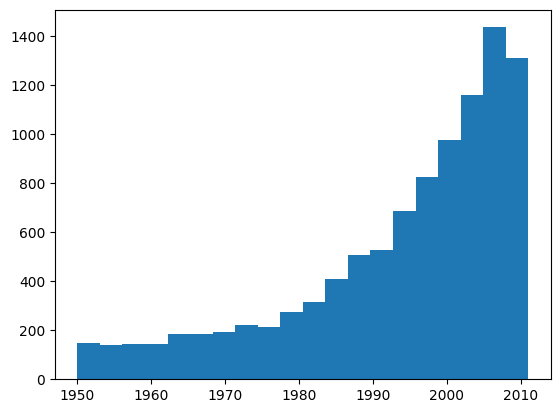

In [35]:
#Your code here
#data[['year']].plot.hist(bins = 20)
plt.hist(data["year"],bins=20)

__Marks = 1__

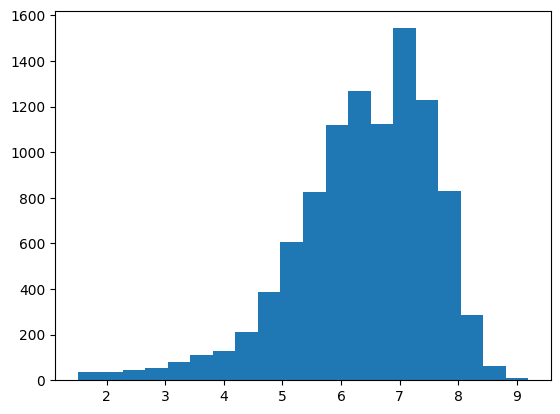

In [36]:
#Your code here
#data[['score']].plot.hist(bins = 20)
plt.hist(data["score"],bins=20)
plt.show()

__Marks = 1__

<Axes: ylabel='Frequency'>

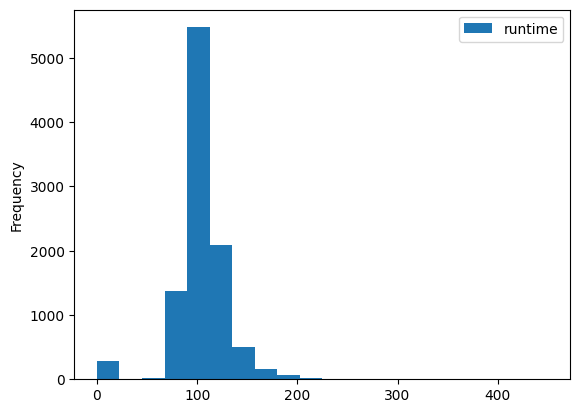

In [37]:
#Your code here
data[['runtime']].plot.hist(bins = 20)

__Marks = 1__

Scatter plot between IMDB rating and years. Does it shows some trend?

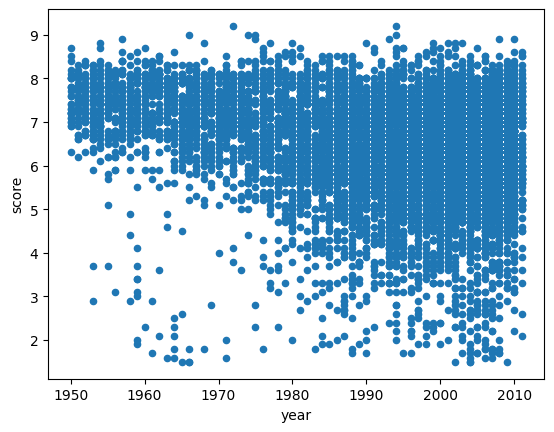

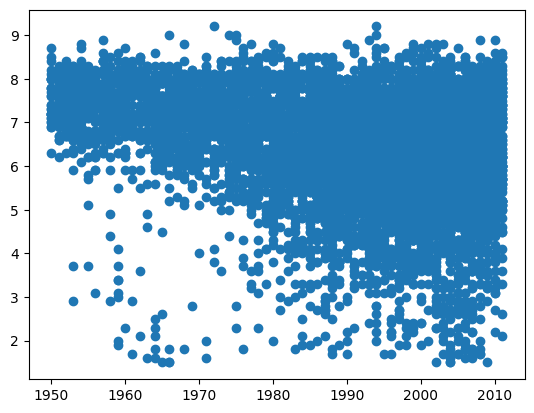

In [38]:
#Your code here
data.plot.scatter(x = 'year', y = 'score')
plt.show()

plt.scatter(data['year'],data['score'])
plt.show()

# It is hard to figure out a trend from this graph but we can say that Average Score Decreased over the years.

__Marks = 2__

Is there any relationship between IMDB rating and number of votes? Describe

<Axes: xlabel='score', ylabel='votes'>

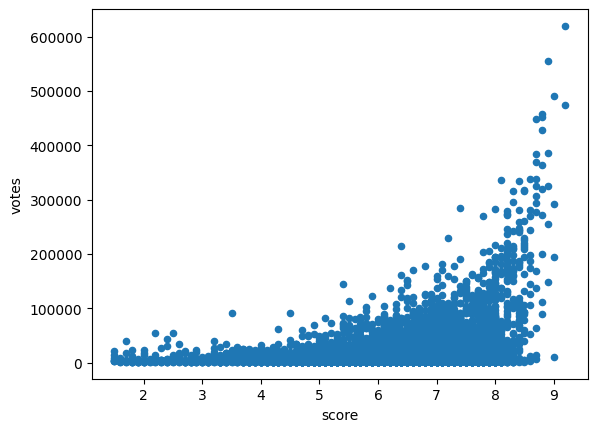

In [39]:
#Your code here
data.plot.scatter(x = "score", y = "votes")
#plt.scatter(data["score"],data["votes"])
# Higher Rated movies received more votes.
# Better the Movie, the More Votes it gets.

__Marks = 2__

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [40]:
#Your code here
#sum sums over rows by default

freq_gens = data.iloc[:, 7:].sum(axis = 0).sort_values(ascending = False)

freq_gens

#Drama, Comedy and Triller are most Frequent Genres

Drama         5697
Comedy        3922
Thriller      2832
Romance       2441
Action        1891
Crime         1867
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
War            512
Biography      394
Music          371
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
News             1
Reality-TV       1
dtype: int64

__Marks = 2__

Draw a bar plot to show top ten genres

<Axes: >

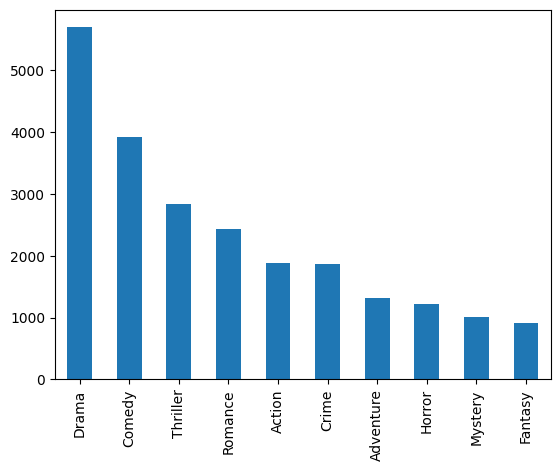

In [41]:
#Your code here
freq_gens[0:10].plot(kind="bar")


__Marks = 2__

*How many genres does a movie have, on average?*

In [42]:
#Your code here
#axis=1 sums over columns instead

data['num_genres'] = data['genres'].astype(str).str.count('\|') + 1

average_num_genres = data['num_genres'].mean()

print("Average number of genres per movie:", average_num_genres)

Average number of genres per movie: 2.7538


<>:4: SyntaxWarning: invalid escape sequence '\|'
<>:4: SyntaxWarning: invalid escape sequence '\|'
C:\Users\HP\AppData\Local\Temp\ipykernel_61376\998677998.py:4: SyntaxWarning: invalid escape sequence '\|'
  data['num_genres'] = data['genres'].astype(str).str.count('\|') + 1


__Marks = 2__

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=/content/score-year-plot.png>

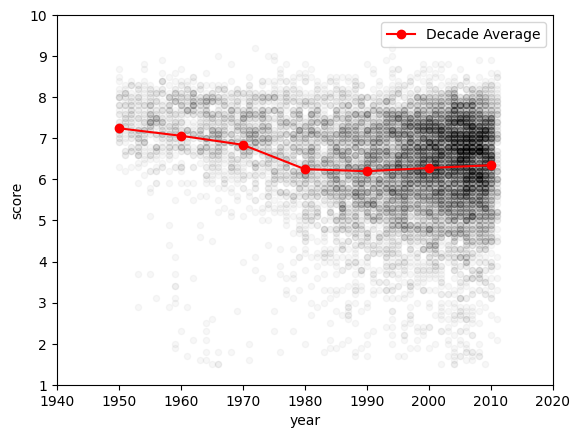

In [43]:
#Your code here
data['decade'] = (data['year']//10) * 10
trend = data.groupby(['decade'])['score'].mean()
data.plot.scatter(x = 'year', y = 'score', color = 'k', alpha = 0.03)
plt.ylim(1, 10)
plt.xlim(1940, 2020)
plt.plot(trend, 'r-o' , label = "Decade Average")
plt.legend(loc="upper right")

__Marks = 5__

Find the most popular movie each year


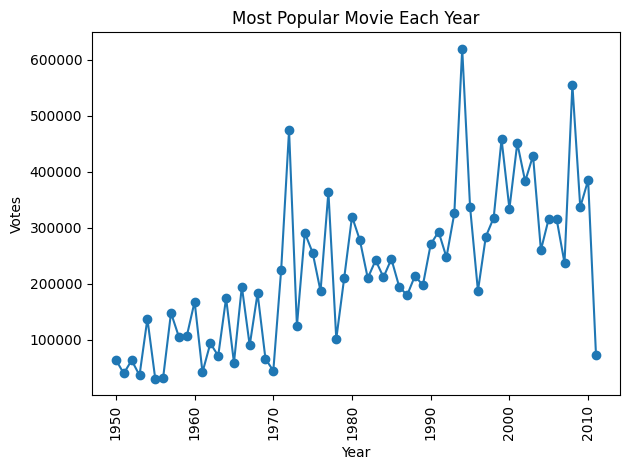

 Year                                                          Movie Title
 1950                                                         Sunset Blvd.
 1951                                                 Strangers on a Train
 1952                                                  Singin' in the Rain
 1953                                                        Roman Holiday
 1954                                                          Rear Window
 1955                                                Rebel Without a Cause
 1956                                                        The Searchers
 1957                                                         12 Angry Men
 1958                                                              Vertigo
 1959                                                   North by Northwest
 1960                                                               Psycho
 1961                                               Breakfast at Tiffany's
 1962                    

In [44]:
#Your code here
sorted_movies = data.sort_values(['year', 'votes'], ascending=[True, False])
popular_movies = sorted_movies.groupby('year').first().reset_index()

plt.plot(popular_movies['year'], popular_movies['votes'], marker='o')
plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Most Popular Movie Each Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the names in a table
popular_movie_names = popular_movies[['year', 'title']]
popular_movie_names.columns = ['Year', 'Movie Title']
print(popular_movie_names.to_string(index=False))



__Marks = 2__